# Compare hidden states when using causal and bidirectional attention

In [1]:
import os
from pathlib import Path

import scipy
import matplotlib.pyplot as plt
import numpy as np 

In [5]:
# model_name_or_path = "princeton-nlp/Sheared-LLaMA-1.3B"
# model_name_or_path = "meta-llama/Llama-2-7b-hf"
# model_name_or_path = "meta-llama/Llama-2-7b-chat-hf"
# model_name_or_path = "mistralai/Mistral-7B-v0.1"
model_name_or_path = "mistralai/Mistral-7B-Instruct-v0.2"

In [6]:
data_path = f"/data/hidden_states_data/{model_name_or_path.split('/')[-1]}"

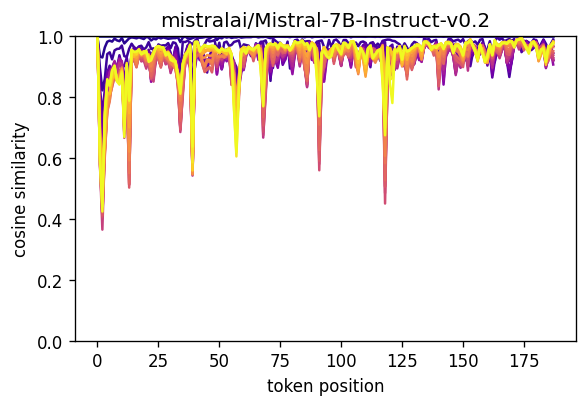

In [7]:
num_layers = 24

colors = plt.cm.plasma(np.linspace(0, 1, num_layers))

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(5, 3.5), dpi=120)

for idx, layer in enumerate(range(num_layers)):
    H_c = np.load(os.path.join(data_path, "causal", f"H_layer{layer}.npy")).squeeze()
    H_b = np.load(os.path.join(data_path, "bidirectional", f"H_layer{layer}.npy")).squeeze()
    # l2 = np.linalg.norm(H_c - H_b, axis=1)
    
    cosine_sim = [1 - scipy.spatial.distance.cosine(H_c[pos], H_b[pos]) for pos in range(len(H_c))]
    
    axes.plot(cosine_sim, label=f"layer={layer}", c=colors[idx])

# format plot
axes.set_xlabel("token position")
axes.set_ylabel("cosine similarity")
axes.set_ylim(0, 1)
# axes.set_yscale("log")
# axes.legend(loc="best", fontsize=10)

axes.set_title(model_name_or_path)

fig.tight_layout()
plt.show()
plt.close();